In [5]:
import math
import numpy as np
from scipy import signal
import IPython.display as ipd
import matplotlib.pyplot as plt
from IPython.display import display
from config import SAMPLE_RATE, nsamples, angular_freq, amp, sample_space
sampling_freq = SAMPLE_RATE

# Envelope

To control the sound behaviour over time, we use **Envelopes** these really help shape the  sound we hear and are some of the building blocks of sound design!!

Envelopes can be used in synthesis to modulate literally anything in the signal path including the parameters of other modulators like LFOs. Yet many still consider their use simply in terms of amplitude modulation alone


The first part is the **Amplifier Envelope** which controls the volume of the amplifier using four common parameters abbrevated as ADSR (Replace VALUE with sound for amplitude)

- attack (how fast sound reaches full VALUE)
- decay (how quickly the VALUE declines after attack)
- sustain (how long should the VALUE last)
- release (how long until VALUE gradually becomes silence after sustaining)

![test](https://thewolfsound.com/assets/img/posts/synthesis/2022-07-03-envelopes/ADSR.webp)



In [6]:
frequency = 5
duration = 1  # seconds
amplitude = 1

envelope = np.ones_like(sample_space)  # Initialise Envelope
sine_wave = np.sin(angular_freq(frequency))  # Initialise sine wave

def asdf_envelope(
    sine_wave,
    sampling_freq, 
    attack_duration=0, 
    sustain_duration=0,
    decay_duration=0, 
    release_duration=0,
    sustain_level=1
):


    # Apply attack envelope
    attack_samples = int(attack_duration * sampling_freq)
    envelope[:attack_samples] = np.linspace(0, 1, attack_samples)

    # Apply sustain envelope
    sustain_samples = int(sustain_duration * sampling_freq)
    start_sustain = attack_samples
    envelope[start_sustain:start_sustain+sustain_samples] = sustain_level

    # Apply decay envelope
    decay_samples = int(decay_duration * sampling_freq)
    start_decay = start_sustain + sustain_samples
    envelope[start_decay:start_decay+decay_samples] = np.linspace(sustain_level, 0, decay_samples)

    # Apply fade-out envelope
    release_samples = int(release_duration * sampling_freq)
    start_release = len(sample_space) - release_samples
    envelope[start_release:] = np.linspace(0, 0, release_samples)
    
    # Generate the modulated sine wave
    sine_wave_asdf = amplitude * envelope * sine_wave

    return sine_wave_asdf, envelope

In [7]:
# Parameters for the ASDF envelope
attack_duration = 0.2  # seconds
sustain_duration = 0.5  # seconds
decay_duration = 0.3  # seconds
release_duration = 0.2  # seconds
sustain_level = 0.6  # Amplitude during sustain phase

# Generate the ASDF envelope
sine_asdf, envelope = asdf_envelope(
    sine_wave, 
    sampling_freq, 
    attack_duration,
    sustain_duration, 
    decay_duration, 
    release_duration, 
    sustain_level
)

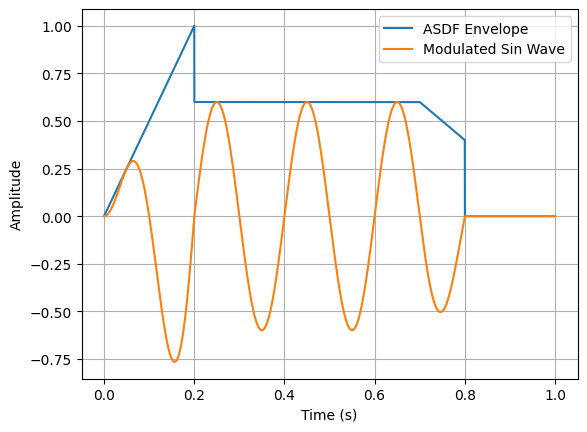

In [8]:
# Plot the ASDF envelope and the modulated sinusoidal wave
plt.figure()
plt.plot(sample_space, envelope, label='ASDF Envelope')
plt.plot(sample_space, sine_asdf, label='Modulated Sin Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [12]:
sine_wave = np.sin(angular_freq(400))  # High frequency Sin wave

### Playing around with ASDF for effects

Pluck Effect

- Attack (A): A relatively short attack time, such as 0.1 to 0.3, to create the initial sharp attack of the pluck.

- Decay (D): A short decay time, typically around 0.1 to 0.5, to simulate the quick decay after the attack, resembling the plucking action.

- Sustain (S): Set to zero (0) or a very low value (e.g., 0.1) since a plucking sound usually does not sustain.

- Release (R):A short release time, around 0.1 to 0.5, to define how quickly the sound diminishes after the decay phase.


In [18]:
# Pluck Effect
attack_duration = 0.1  # seconds
sustain_duration = 0  # seconds
decay_duration = 0.3  # seconds
release_duration = 0.2  # seconds
sustain_level = 1  # Amplitude during sustain phase

# Generate the ASDF envelope
sine_asdf, envelope = asdf_envelope(
    sine_wave, 
    sampling_freq, 
    attack_duration,
    sustain_duration, 
    decay_duration, 
    release_duration, 
    sustain_level
)
ipd.Audio(sine_asdf, rate=SAMPLE_RATE)